In [3]:
"""

Write a program to perform a Monte Carlo integration of the function f(x) = exp(􀀀x2)
between 0 and 100 using N = 10000 samples. The exact result is 0.88623

"""

import numpy as np
import matplotlib.pyplot as plt


In [11]:
# Some constants
N_SAMPLES = 10000

# 3.1.1 Use simple sampling to estimate the value and MC error

In [35]:
def simple_sampling(n_samples=N_SAMPLES):
    # Returns a tuple of the MC estimate and error

    simple_x = np.random.uniform(size=n_samples) * 100
    simple_fx = np.exp(-np.square(simple_x))
    return np.mean(simple_fx) * 100, np.std(simple_fx, ddof=1)

simple_pred, simple_mc_err = simple_sampling()
print("For simple sampling, the estimate is {} and the MC error is {}".format(simple_pred, simple_mc_err))

For simple sampling, the estimate is 0.804859123898 and the MC error is 0.0751527996649


In [36]:
# 3.1.2 Repeat 50 times and plot

In [37]:
def repeated_sampling(n_iter=50, sampling=simple_sampling, n_samples=N_SAMPLES):
    res = np.zeros(n_iter)
    err = np.zeros(n_iter)

    for i in range(n_iter):
        res[i], err[i] = sampling(n_samples)
        
    plt.errorbar(np.arange(n_iter), res, yerr=err)
    
    return res, err

(array([0.8997107 , 0.97578358, 0.80596727, 0.85017453, 0.82266904,
        0.93373801, 0.84852141, 0.94973356, 0.93858428, 0.98196312,
        0.9026004 , 1.02144636, 0.9426699 , 0.68799148, 0.95220749,
        0.94291396, 0.89584669, 0.89854783, 0.84336622, 0.93923157,
        0.92117062, 0.89832288, 0.76668553, 0.91502787, 0.87617115,
        0.81261752, 0.80854759, 0.86284433, 0.94046689, 0.97310769,
        0.7893606 , 1.12178899, 0.69719182, 0.97569974, 0.86102809,
        0.92616767, 0.9226059 , 0.94045212, 0.89121077, 0.85104619,
        0.77702178, 0.67526322, 0.83101912, 0.89778111, 0.99753942,
        0.81371226, 0.79623744, 0.84556214, 1.00288689, 0.79498285]),
 array([0.08061141, 0.08341855, 0.07418114, 0.07660076, 0.07605789,
        0.08135313, 0.07648712, 0.08221853, 0.08118341, 0.08406587,
        0.08019123, 0.08545321, 0.08291109, 0.06667824, 0.08106385,
        0.08166222, 0.08054847, 0.07985051, 0.07600148, 0.08236099,
        0.07898474, 0.07952122, 0.07184836, 0.

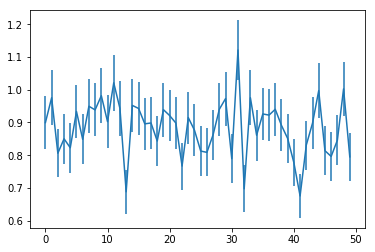

In [38]:
repeated_sampling()

In [39]:
# 3.1.3 Use importance sampling with prior ~ exp(-x) and compare

def importance_sampling(n_samples=N_SAMPLES):
    # Returns a tuple of the MC estimate and error
    simple_u = np.random.uniform(size=n_samples)
    simple_x = - np.log (1 - simple_u)
    simple_fx = np.exp(- np.square(simple_x))
    return np.mean(simple_fx), np.std(simple_fx)

(array([ 10.21636903,  10.4892216 ,   8.88740726,  10.85184613,
         13.4567845 ,   7.60472382,   9.67224988, 262.14793255,
        206.40561615,  13.79382508,  11.83674167,  15.92147801,
          8.09182104,   9.54088813,  10.47804624,   9.53941683,
          9.94250886,   9.48364672,   8.51153784,  18.16416436,
          6.84224692,  15.98602112,   7.09314927,   9.08910059,
         11.52650991,   8.75041779,  15.96022108,  10.63333451,
         11.13805288,  10.17484344,   7.34038998,  18.97954555,
        162.98307601,  10.2847667 ,  10.52968256,  10.41730577,
         26.02799075,   7.55807567,  11.73164156,  19.01728693,
          9.57730123,   8.85737676,   6.67303736,  15.60567612,
         14.25438582,   7.82229706,  10.58660676,  10.66121292,
         12.17869152,   8.10760508]),
 array([  249.973559  ,   186.32294538,    83.20395376,   179.06991083,
          410.84689199,    58.19860832,   192.12286401, 24844.48212092,
        19862.87566789,   317.77743513,   192.0558

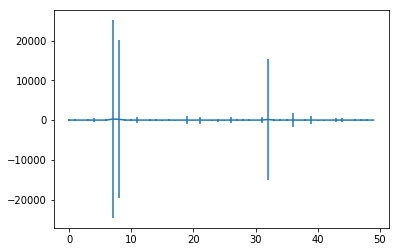

In [28]:
repeated_sampling(sampling=importance_sampling)

In [22]:
def metropolis_alg(n_thermalization_steps=10000, n_mc_steps=2**18, delta=0.2):
    def w_of_x(x):
        if x < 0 or x >1:
            return 0
        
        return np.exp(-x)
    
    def update(x):
        cand = x + (np.random.uniform()-0.5)*2*delta

        prob_ratio = w_of_x(cand)/w_of_x(x)
        
        if prob_ratio > 1 or np.random.uniform() < prob_ratio:
            return cand
        
        return x
    x = np.random.uniform()
    samples = np.zeros(n_mc_steps)
        
    for t in range(n_thermalization_steps):
        x = update(x)
            
    for t in range(n_mc_steps):
        x = update(x)       
        samples[t] = x
        
    return samples

In [65]:
print('True result: {}'.format(1-np.exp(-1)))

mc_samples = metropolis_alg()
A = np.mean(mc_samples)
delta_A_naive = np.std(mc_samples, ddof=1) / np.sqrt(mc_samples.size)
print('MC result: {} with naive error {}'.format(A, delta_A_naive))

True result: 0.632120558829
MC result: 0.41534557786 with naive error 0.000549202547861


In [ ]:
def binning_analysis(samples, stop_n_before=3):
    bins = np.zeros(int(np.log2(samples.size))-stop_n_before)
    binned = 
    bins[0] = np.std(binned, ddof=1)/ np.sqrt(binned.size) 
    
    for i in range(1, bins.size):
        binned = (binned + np.roll(binned, 1))[1::2]/2
        bins[i] = np.std(binned, ddof=1) / np.sqrt(binned.size)
        
    return bins

True error: [0.00055085 0.00076616 0.00105802 0.0014352  0.00188327 0.00234995
 0.00273485 0.0029952  0.00311366 0.00315537 0.00320825 0.00328488
 0.00327721 0.00336995 0.00322319]


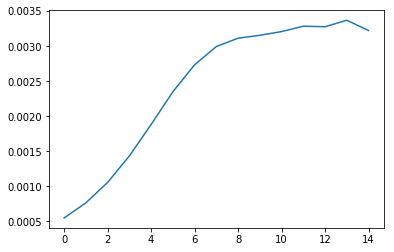

In [59]:
delta_A_true = binning_analysis(mc_samples)

print("True error: {}".format(delta_A_true))
plt.plot(delta_A_true)